# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第12课：
## 官方示例讲解-复杂网络社团的高阶可视化

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）
# 示例程序所用库的版本：igraph==0.10.4

### 任务需求：网络的社团检测，不同社团内的节点用不同的颜色着色；
### 社团内的边与该社团的节点颜色统一，不同社团之间的边用其他颜色着色
### 更高阶的需求：用颜色块覆盖社团中的节点

In [2]:
import igraph as ig
import matplotlib.pyplot as plt

In [3]:
g = ig.Graph.Famous("Zachary")

In [4]:
# Use edge betweenness to detect communities
communities = g.community_edge_betweenness()
# ... and convert into a VertexClustering for plotting
communities = communities.as_clustering()

In [5]:
# Color each vertex and edge based on its community membership
num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]["color"] = i
    community_edges = g.es.select(_within=community)
    community_edges["color"] = i

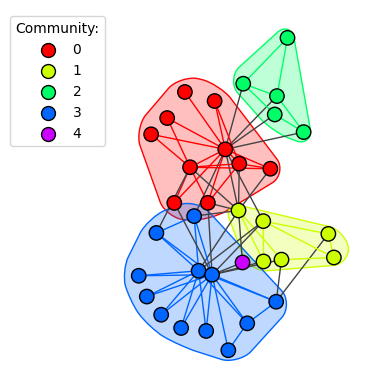

In [6]:
# 仅用顶点和边着色绘制
fig, ax = plt.subplots()
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    mark_groups=True,
    vertex_size=0.3,
)

# 增加图例
legend_handles = []
for i in range(num_communities):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)

ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)

### 在看一个网络可视化结果：随机块网络

In [7]:
n = 60
block_sizes = [20, 15, 25]
pref_matrix = [[0.25, 0.01, 0.01], [0.01, 0.35, 0.02], [0.01, 0.02, 0.40]]
g_SBM = ig.Graph.SBM(n, pref_matrix, block_sizes)
# 设置标签
# g_SBM.vs["label"] = range(len(g.vs))
# ig.plot(g_SBM, bbox=(300, 300))

In [8]:
communities_SBM = g_SBM.community_edge_betweenness()
communities_SBM = communities_SBM.as_clustering()
cn_SBM = len(communities_SBM)

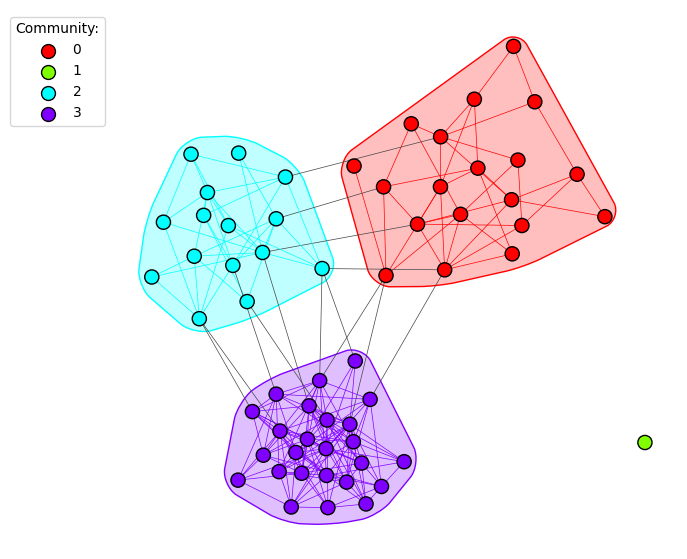

In [9]:
palette = ig.RainbowPalette(n=cn_SBM)
for i, community in enumerate(communities_SBM):
    g_SBM.vs[community]["color"] = i
    community_edges = g_SBM.es.select(_within=community)
    community_edges["color"] = i

fig, ax = plt.subplots(figsize=(8, 7))
ig.plot(
    communities_SBM,
    vertex_size=0.3,
    # vertex_label=range(g.vcount()),
    mark_groups=True,
    palette=palette,
    edge_width=0.5,
    target=ax,
)

# 增加图例
legend_handles = []
for i in range(cn_SBM):
    handle = ax.scatter(
        [], [],
        s=100,
        facecolor=palette.get(i),
        edgecolor="k",
        label=i,
    )
    legend_handles.append(handle)

ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0, 1.0),
    bbox_transform=ax.transAxes,
)


plt.savefig("community_SBM.pdf")